In [268]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

In [269]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
import copy

1. Для изображения sar_3.jpg найти наиболее протяженный участок
(выделить линии при помощи преобразования Хафа)

Константы 1-го задания для параметров (для удобства настройки)

In [ ]:
IMAGE_PATH = 'sar_3.jpg'
GAUSS_BLUR_KERNEL_SIZE = (3, 3)
MEDIAN_BLUR_KERNEL_SIZE = 3
CANNY_LOW = 100
CANNY_HIGH = 200
HOUGH_RHO = 1
HOUGH_THETA = np.pi / 360
HOUGH_THRESHOLD = 30
HOUGH_MIN_LINE_LENGTH = 50
HOUGH_MAX_LINE_GAP = 10


Функции для 1-го задания

In [271]:
def load_image(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"File '{path}' not found or incorrect path")
    return image

def detect_edges(image):
    return cv2.Canny(image, CANNY_LOW, CANNY_HIGH)

def find_longest_line(edges):
    lines = cv2.HoughLinesP(
        edges, rho=HOUGH_RHO, theta=HOUGH_THETA,
        threshold=HOUGH_THRESHOLD, minLineLength=HOUGH_MIN_LINE_LENGTH,
        maxLineGap=HOUGH_MAX_LINE_GAP
    )
    
    image_with_lines = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    longest_line = None
    max_length = 0
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            if length > max_length:
                max_length = length
                longest_line = (x1, y1, x2, y2)
    
    if longest_line is not None:
        cv2.line(image_with_lines, longest_line[:2], longest_line[2:], (0, 0, 255), 2)
    
    return longest_line, image_with_lines

def visualize_task1(original, edges, image_with_lines):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    axes[1].imshow(edges, cmap='gray')
    axes[1].set_title('Edges (Canny) used blurred image')
    axes[1].axis('off')
    
    axes[2].imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
    axes[2].set_title('The longest line')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

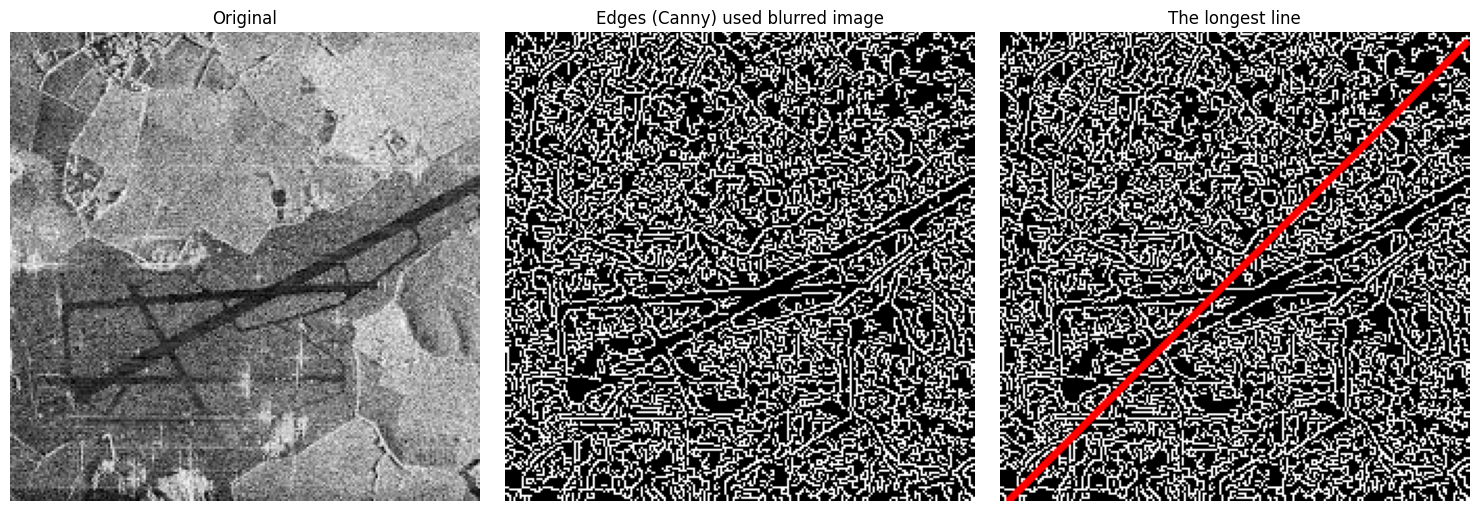

Found the longest line: (np.int32(4), np.int32(224), np.int32(223), np.int32(5))


In [272]:
image = load_image(IMAGE_PATH)
blurred_img = cv2.GaussianBlur(image, GAUSS_BLUR_KERNEL_SIZE, 0)
edges = detect_edges(blurred_img)
longest_line, image_with_lines = find_longest_line(edges)

visualize_task1(image, edges, image_with_lines)

if longest_line is not None:
    print(f"Found the longest line: {longest_line}")
else:
    print("Lines not found.")

2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

Константы для 2-го задания

In [273]:
MORPH_KERNEL_SIZE = (5, 5)
ADAPTIVE_BLOCK_SIZE = 61
ADAPTIVE_CONSTANT = 3

Функции для 2-го задания

In [274]:
def binarize_otsu(image):
    _, thresh = cv2.threshold(image, 0, 100, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

def binarize_adaptive(image):
    return cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, ADAPTIVE_BLOCK_SIZE, ADAPTIVE_CONSTANT
    )

def process_binary_mask(binary):
    kernel = np.ones(MORPH_KERNEL_SIZE, np.uint8)
    return cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

def extract_road_segment(image, mask):
    return cv2.bitwise_and(image, image, mask=mask)

def visualize_task2( original, otsu,
    adaptive, processed, road):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    axes[0, 0].imshow(original, cmap='gray')
    axes[0, 0].set_title('Original')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(otsu, cmap='gray')
    axes[0, 1].set_title('Otsu binarizing')
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(adaptive, cmap='gray')
    axes[0, 2].set_title('Adaptive binarizing')
    axes[0, 2].axis('off')
    
    axes[1, 0].imshow(processed, cmap='gray')
    axes[1, 0].set_title('Processed mask')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(road, cmap='gray')
    axes[1, 1].set_title('Selected road')
    axes[1, 1].axis('off')
    
    axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

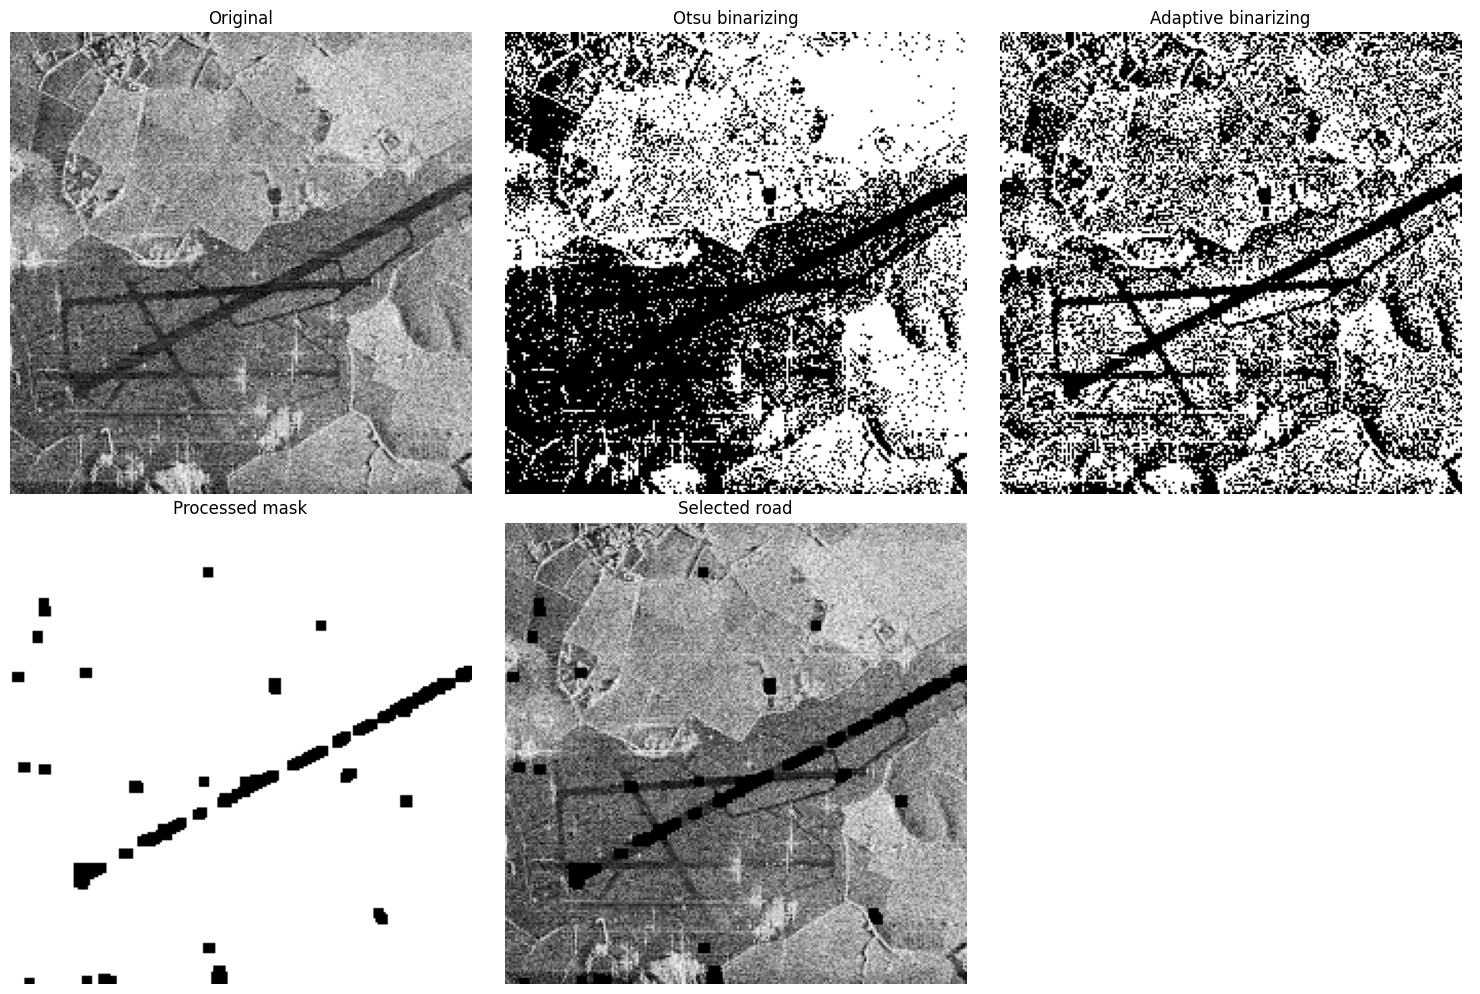

In [275]:
otsu_thresh = binarize_otsu(image)
adaptive_thresh = binarize_adaptive(image)
processed_binary = process_binary_mask(adaptive_thresh)
road_segment = extract_road_segment(image, processed_binary)

visualize_task2(
    image, otsu_thresh, adaptive_thresh,
    processed_binary, road_segment
)